In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imshow, show, imread_collection, imshow_collection
# from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.pyplot as plt


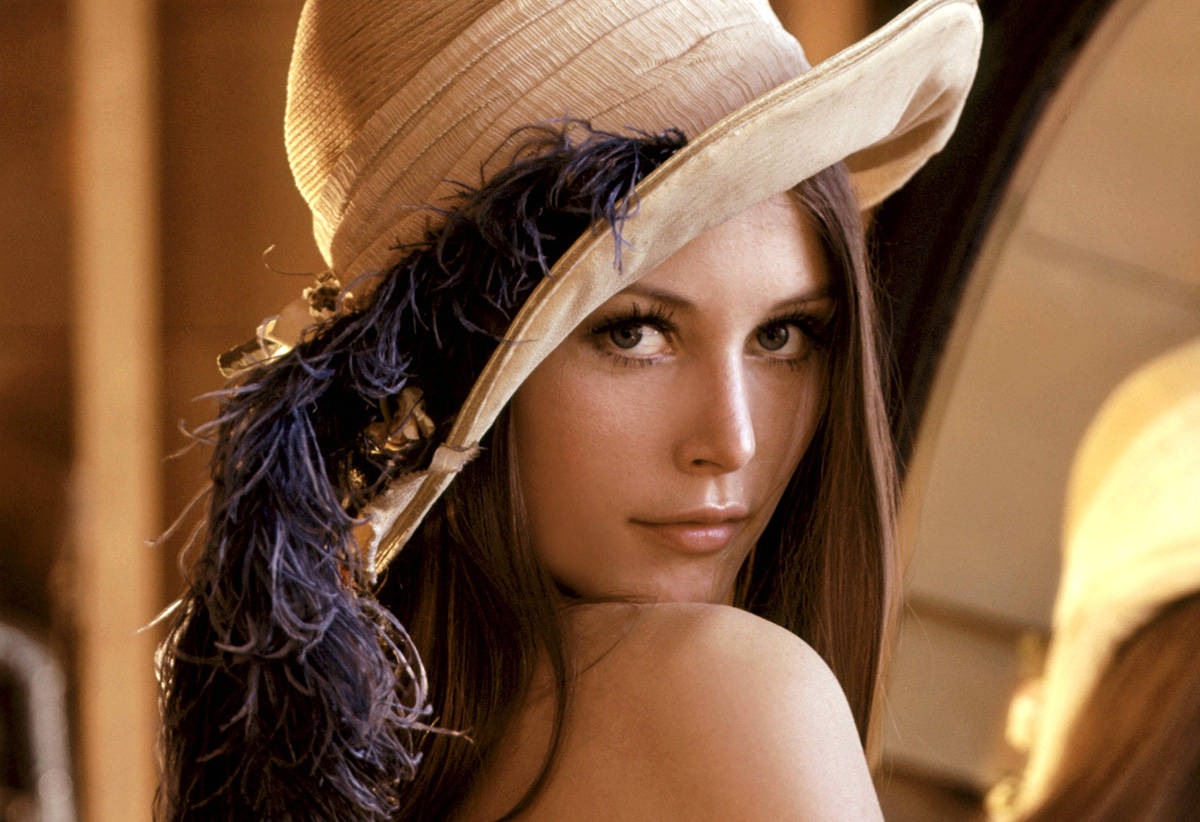

In [11]:
im = Image.open("lena.jpg")
im_l = im.convert("L")
im_p = im.convert("P")

im

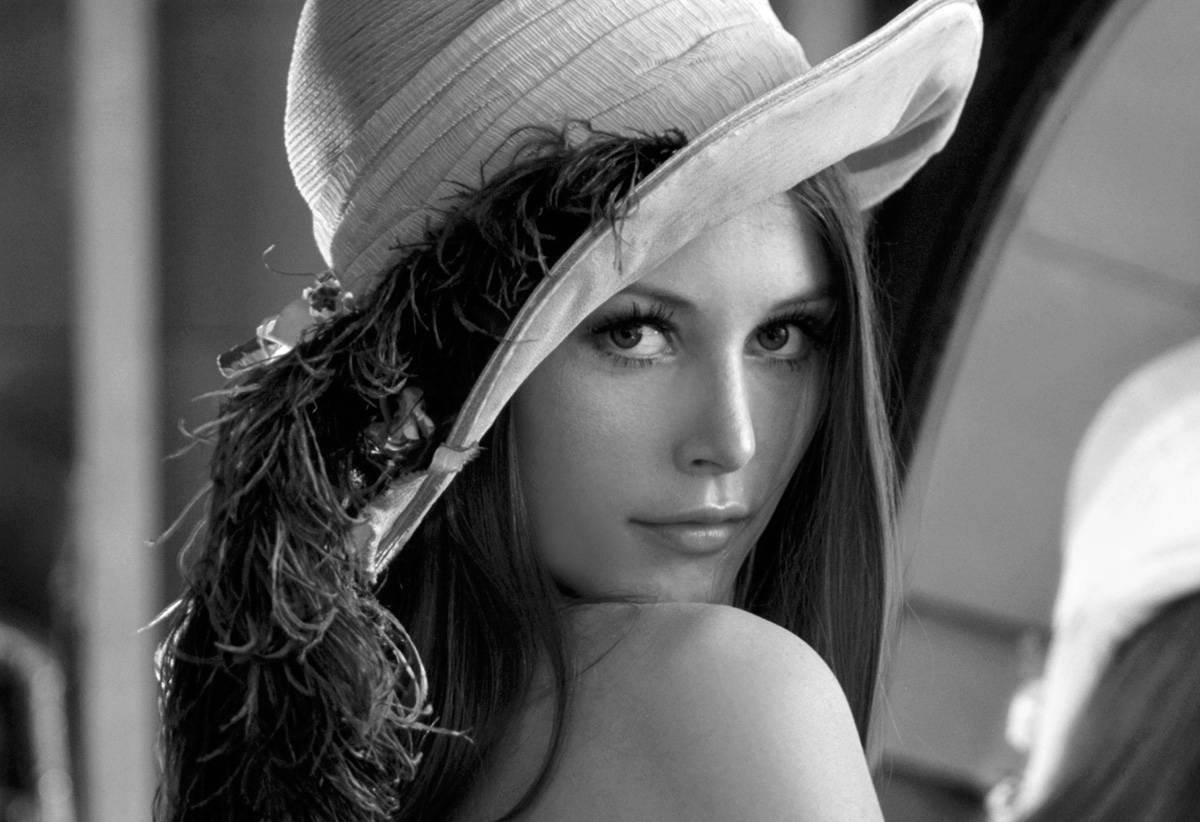

In [12]:
im_l

In [14]:
im_p.show()

256 256 L None <class 'PIL.Image.Image'>


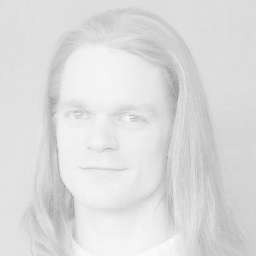

In [18]:
im = Image.open("low_cont1.jpg").convert("L")
print(im.width, im.height, im.mode, im.format, type(im))
im

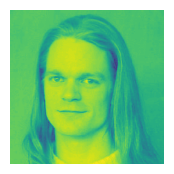

In [19]:
plt.figure(figsize=(2,2))
plt.imshow(im)
plt.axis('off')
plt.show()

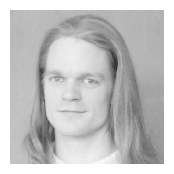

In [20]:
plt.figure(figsize=(2,2))
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [22]:
x = np.array(im)
x

array([[221, 221, 221, ..., 219, 219, 219],
       [221, 221, 219, ..., 219, 221, 219],
       [221, 221, 221, ..., 219, 219, 219],
       ...,
       [227, 227, 227, ..., 205, 205, 207],
       [225, 227, 227, ..., 207, 207, 207],
       [225, 227, 227, ..., 207, 207, 209]], dtype=uint8)

In [23]:
x.shape

(256, 256)

In [33]:
im = imread("low_cont1.jpg")
im.shape

(256, 256, 3)

In [31]:
print(im)

[[[221 221 221]
  [221 221 221]
  [221 221 221]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [221 221 221]
  [219 219 219]
  ...
  [219 219 219]
  [221 221 221]
  [219 219 219]]

 [[221 221 221]
  [221 221 221]
  [221 221 221]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 ...

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [205 205 205]
  [205 205 205]
  [207 207 207]]

 [[225 225 225]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[225 225 225]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [207 207 207]
  [209 209 209]]]


In [2]:
import matplotlib.image as mpimg

im1 = mpimg.imread("lena.jpg") / 255 # rescale to 0-1
im2 = Image.open("blue_flowers.jpg")
# for blending, the images must have the same size. We resize im2 to the size of im1
im3 = np.array(im2.resize((im1.shape[1], im1.shape[0]), Image.BILINEAR)) / 255 # BILINEAR is the interpolation method

In [38]:
im2.size

(5184, 3456)

In [39]:
im1.shape

(822, 1200, 3)

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


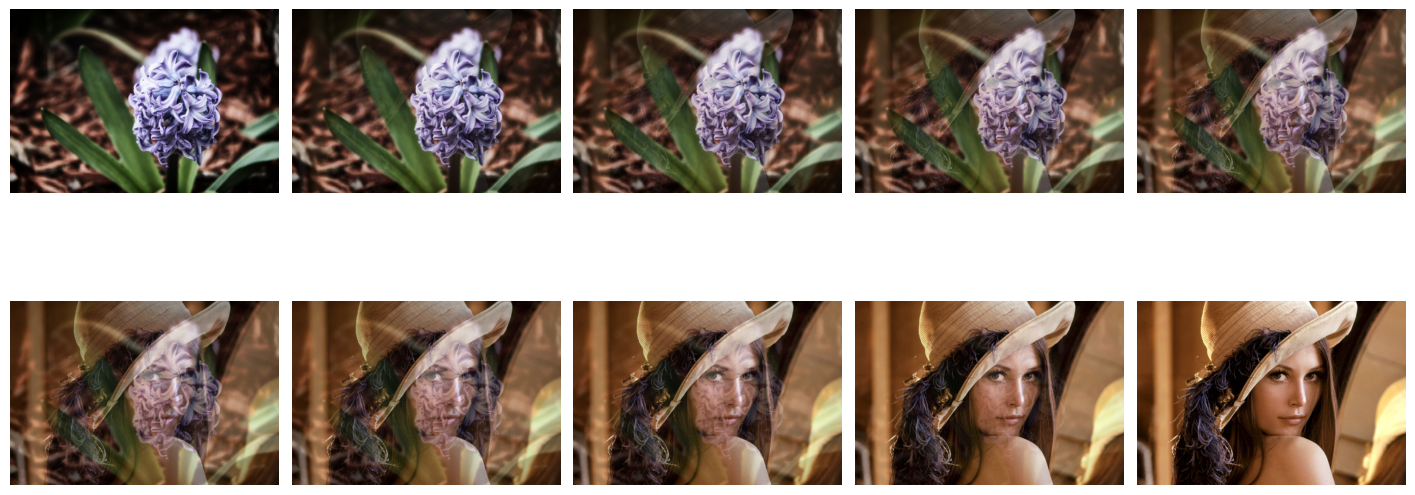

In [45]:
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0, 1, 10):
    print(alpha)
    plt.subplot(4,5, i)
    o_img = (1 - alpha) * im3 + alpha * im1
    plt.imshow(o_img)
    plt.axis('off')
    i += 1
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [1]:
import cv2

image = cv2.imread("lena.jpg")
(B, G, R) = cv2.split(image)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

97

: 

In [3]:
blended_images = []
for alpha in np.linspace(0, 1, 200):
    o_img = (1 - alpha) * im3 + alpha * im1
    blended_images.append(o_img)

In [6]:
i = 0
for image in blended_images:
    im = Image.fromarray((image * 255).astype(np.uint8))
    # save the image: in 3 digits format
    im.save("blended_images/blended_image_{:03d}.jpg".format(i))
    i += 1

In [9]:
!ffmpeg -r 50 -i blended_images/blended_image_%03d.jpg -vf "fps=50,format=yuv420p" -t 10 ./blended_video.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


In [13]:
import cv2
import os
from os.path import isfile, join

def convert_frames_to_video(pathIn, pathOut, fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    
    # for sorting the file names properly
    files.sort(key = lambda x: int(x[-7:-4]))
    
    for i in range(len(files)):
        filename = pathIn + files[i]
        # read frames
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        # inserting the frames into an image array
        frame_array.append(img)
    
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

pathIn = './blended_images/'
pathOut = './video.avi'
fps = 64.0
convert_frames_to_video(pathIn, pathOut, fps)